In [3]:
# an example dataframe, note the repeated formulas
import pandas as pd
df = pd.read_csv('/home/anderson/dcode/mlbf/phase/relu/neurons_relu_v80_onphase_v80_c343_r4.287.csv')
df.head(5)

,formula,sampler,activation,#neurons,cvfolds,metric,mean,std,start,finish
0,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,1,5,accuracy,0.902041,0.195918,2020-08-31 03:03:39.721621,2020-08-31 03:03:41.561511
1,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,2,5,accuracy,0.988832,0.022335,2020-08-31 03:03:39.721621,2020-08-31 03:03:43.499602
2,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,4,5,accuracy,1.000000,0.000000,2020-08-31 03:03:39.721621,2020-08-31 03:03:45.598222
3,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,1,5,accuracy,0.796010,0.239708,2020-08-31 03:03:45.598636,2020-08-31 03:03:47.887674
4,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,2,5,accuracy,0.991040,0.011078,2020-08-31 03:03:45.598636,2020-08-31 03:03:50.184656


In [4]:
# we'll consider only those sampled with unigen (because they have 40+ samples) 
print(f'Without filtering {len(df)}')
df = df[df.sampler == 'unigen']
print(f'Without filtering {len(df)}')


Without filtering 2130
Without filtering 2130


In [5]:
# then we get the maximum #neurons of each formula (no repeated formulas anymore)
# note that none of those with 512 neurons has perfect accuracy
grouped_df = df.groupby("formula").max().reset_index()
grouped_df.head(5)

,formula,sampler,activation,#neurons,cvfolds,metric,mean,std,start,finish
0,sat_00001_k3_v80_c343.cnf_unigen_476_500.pkl.gz,unigen,relu,8,5,accuracy,1.000000,0.245083,2020-08-31 03:26:56.737639,2020-08-31 03:27:03.802490
1,sat_00002_k3_v80_c343.cnf_unigen_297_500.pkl.gz,unigen,relu,4,5,accuracy,1.000000,0.258165,2020-08-31 03:54:12.251641,2020-08-31 03:54:17.353348
2,sat_00003_k3_v80_c343.cnf_unigen_503_500.pkl.gz,unigen,relu,512,5,accuracy,0.999005,0.199512,2020-08-31 03:56:54.508929,2020-08-31 03:57:17.684055
3,sat_00004_k3_v80_c343.cnf_unigen_311_500.pkl.gz,unigen,relu,8,5,accuracy,1.000000,0.186421,2020-08-31 03:15:24.610356,2020-08-31 03:15:31.614462
4,sat_00005_k3_v80_c343.cnf_unigen_76_500.pkl.gz,unigen,relu,8,5,accuracy,1.000000,0.425998,2020-08-31 03:27:15.317631,2020-08-31 03:27:20.991172


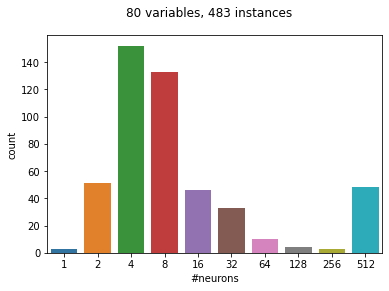

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# now, I'll plot a count of how many formulas were mastered with each number of neurons
plt.figure()
sns.countplot(x="#neurons", data=grouped_df) #kudos: https://stackoverflow.com/a/58021306/1251716
plt.suptitle(f'80 variables, {len(grouped_df)} instances')
pass # holds the output of suptitle

## The problem is with multiple plots
Each will have a different number of instances (see code below), hence different y scales. I want the y axis in %

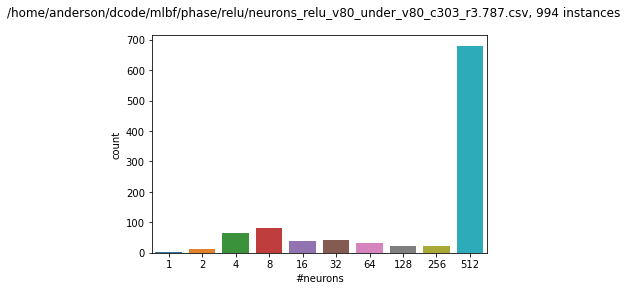

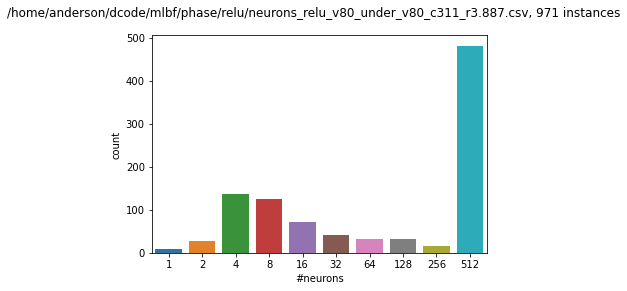

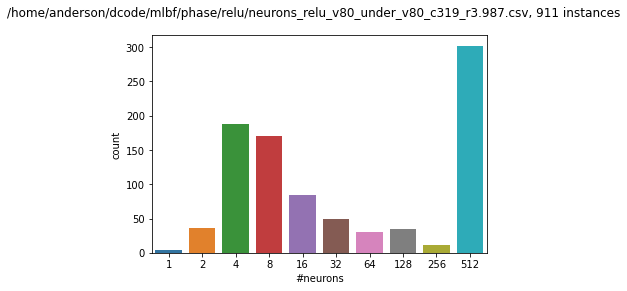

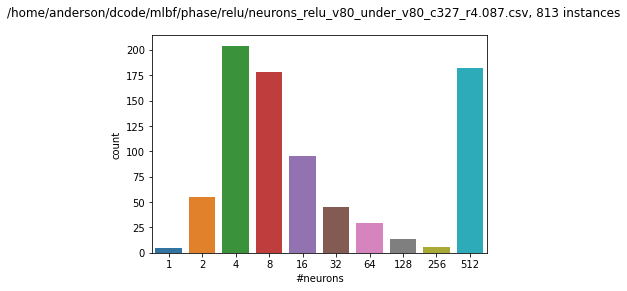

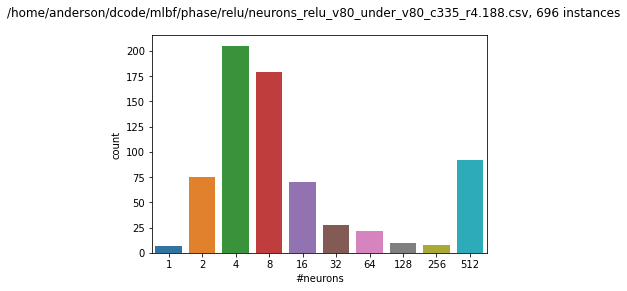

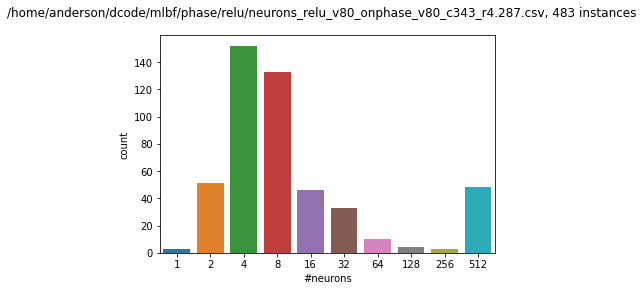

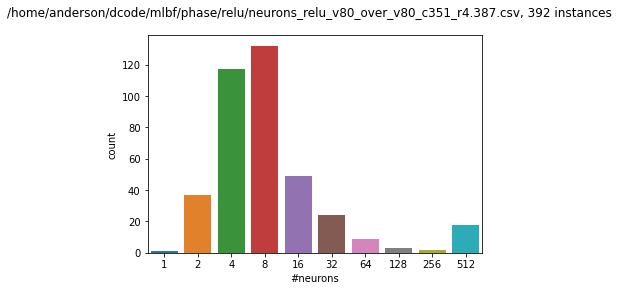

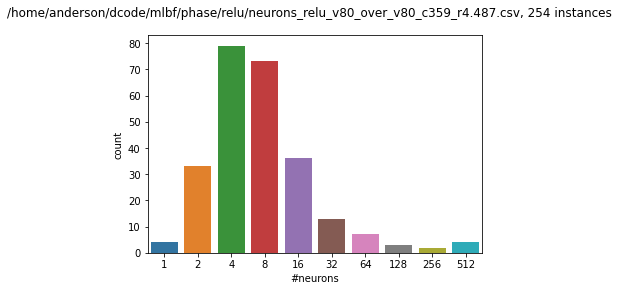

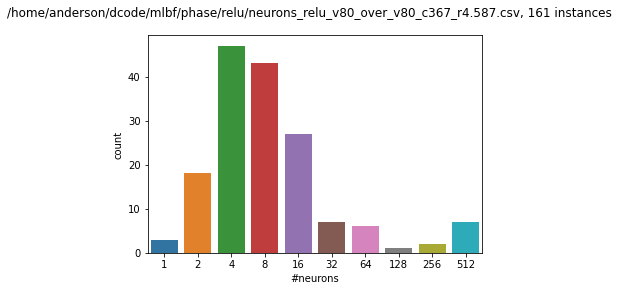

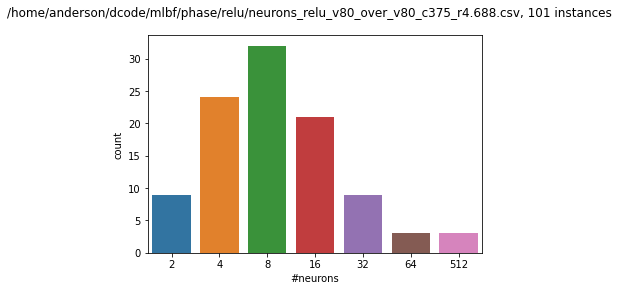

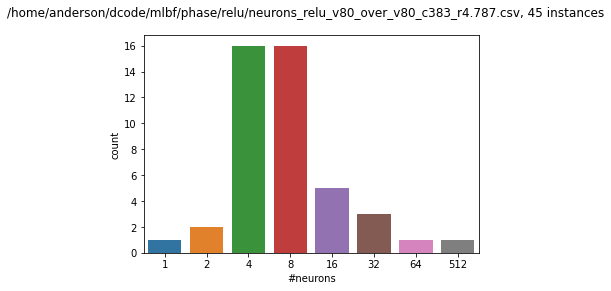

In [7]:
import re
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def dir_string_ratio(dir_str):
    """
    Extracts the ratio on a directory string.
    Useful for sorting in increasing difficulty
    """
    pattern = re.compile(r"r(\d\.\d+)\.csv")
    return float(pattern.search(dir_str).group(1))

def plot_num_neurons(basedir, num_vars, activation):

    for f in sorted(glob(f'{basedir}/neurons_{activation}_v{num_vars}_*.csv'), key=dir_string_ratio):
        df = pd.read_csv(f)
        df = df[df.sampler == 'unigen']  # gets only instances with 40+ solutions
        grouped_df = df.groupby("formula").max().reset_index()
        plt.figure()
        sns.countplot(x="#neurons", data=grouped_df) #kudos: https://stackoverflow.com/a/58021306/1251716
        plt.suptitle(f'{f}, {len(grouped_df)} instances')
        #plt.show()
        #plt.savefig(f'/tmp/{g}_freq.pdf')

plot_num_neurons('/home/anderson/dcode/mlbf/phase/relu/', 80, 'relu')